In [1]:
!pip install wordcloud


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from datasets import load_dataset
import pandas as pd
from transformers import AutoTokenizer

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk import FreqDist
from nltk.util import ngrams
from collections import Counter
import nltk

In [5]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/rammanyala/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/rammanyala/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [6]:
dataset  = load_dataset("EdinburghNLP/xsum")

Found cached dataset xsum (/Users/rammanyala/.cache/huggingface/datasets/EdinburghNLP___xsum/default/1.2.0/082863bf4754ee058a5b6f6525d0cb2b18eadb62c7b370b095d1364050a52b71)


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
dataset 

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 204045
    })
    validation: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11332
    })
    test: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11334
    })
})

In [29]:
df = pd.DataFrame(dataset['train'])
df

,document,summary,id
0,"The full cost of damage in Newton Stewart, one...",Clean-up operations are continuing across the ...,35232142
1,A fire alarm went off at the Holiday Inn in Ho...,Two tourist buses have been destroyed by fire ...,40143035
2,Ferrari appeared in a position to challenge un...,Lewis Hamilton stormed to pole position at the...,35951548
3,"John Edward Bates, formerly of Spalding, Linco...",A former Lincolnshire Police officer carried o...,36266422
4,Patients and staff were evacuated from Cerahpa...,An armed man who locked himself into a room at...,38826984
...,...,...,...
204040,The initial figure released in July was booste...,UK economic growth for the second quarter of t...,34084759
204041,"MEPs, including European Parliament chief Brex...",Theresa May's offer to give EU citizens in the...,40552318
204042,Lincoln Red Imps will bring a 1-0 lead to Glas...,Erik Sviatchenko is adamant that Celtic will p...,36781065
204043,Former Liverpool defender Mark Lawrenson expan...,People have spent a large part of this season ...,31579588


# EDA and Preprocessing

In [9]:
def display_feature_list(features, feature_type):
    print(f"\n{feature_type} Features: ")
    print(', '.join(features) if features else 'None')

def describe_df(df):
    global categorical_features, continuous_features, binary_features
    categorical_features = [col for col in df.columns if df[col].dtype == 'object']
    binary_features = [col for col in df.columns if df[col].nunique() <= 2 and df[col].dtype != 'object']
    continuous_features = [col for col in df.columns if df[col].dtype != 'object' and col not in binary_features]

    print(f"\n{type(df).__name__} shape: {df.shape}")
    print(f"\n{df.shape[0]:,.0f} samples")
    print(f"\n{df.shape[1]:,.0f} attributes")
    print(f'\nMissing Data: \n{df.isnull().sum()}')
    print(f'\nDuplicates: {df.duplicated().sum()}')
    print(f'\nData Types: \n{df.dtypes}')

    #negative_valued_features = [col for col in df.columns if (df[col] < 0).any()]
    #print(f'\nFeatures with Negative Values: {", ".join(negative_valued_features) if negative_valued_features else "None"}')

    display_feature_list(categorical_features, 'Categorical')
    display_feature_list(continuous_features, 'Continuous')
    display_feature_list(binary_features, 'Binary')

    print(f'\n{type(df).__name__} Head: \n')
    display(df.head(5))
    print(f'\n{type(df).__name__} Tail: \n')
    display(df.tail(5))

In [10]:
describe_df(df)


DataFrame shape: (204045, 3)

204,045 samples

3 attributes

Missing Data: 
document    0
summary     0
id          0
dtype: int64

Duplicates: 0

Data Types: 
document    object
summary     object
id          object
dtype: object

Categorical Features: 
document, summary, id

Continuous Features: 
None

Binary Features: 
None

DataFrame Head: 



,document,summary,id
0,"The full cost of damage in Newton Stewart, one...",Clean-up operations are continuing across the ...,35232142
1,A fire alarm went off at the Holiday Inn in Ho...,Two tourist buses have been destroyed by fire ...,40143035
2,Ferrari appeared in a position to challenge un...,Lewis Hamilton stormed to pole position at the...,35951548
3,"John Edward Bates, formerly of Spalding, Linco...",A former Lincolnshire Police officer carried o...,36266422
4,Patients and staff were evacuated from Cerahpa...,An armed man who locked himself into a room at...,38826984



DataFrame Tail: 



,document,summary,id
204040,The initial figure released in July was booste...,UK economic growth for the second quarter of t...,34084759
204041,"MEPs, including European Parliament chief Brex...",Theresa May's offer to give EU citizens in the...,40552318
204042,Lincoln Red Imps will bring a 1-0 lead to Glas...,Erik Sviatchenko is adamant that Celtic will p...,36781065
204043,Former Liverpool defender Mark Lawrenson expan...,People have spent a large part of this season ...,31579588
204044,The incident occurred at the headquarters of t...,Police in Thailand have charged two executives...,35809055


In [11]:
# Train split
train_df = pd.DataFrame(dataset['train'])
train_df.to_csv("xsum_train.csv", index=False)

# Test split
test_df = pd.DataFrame(dataset['test'])
test_df.to_csv("xsum_test.csv", index=False)

# Validation split
validation_df = pd.DataFrame(dataset['validation'])
validation_df.to_csv("xsum_validation.csv", index=False)

print("Datasets saved as CSV files.")

Datasets saved as CSV files.


In [12]:
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large")

In [13]:
def preprocess_function(examples):
    # Tokenize the documents (input texts)
    inputs = tokenizer(examples['document'], max_length=512, truncation=True, padding="max_length", return_tensors='pt')

    # Tokenize the summaries (target texts)
    targets = tokenizer(examples['summary'], max_length=128, truncation=True, padding="max_length", return_tensors='pt')

    return {
        'input_ids': inputs['input_ids'],
        'attention_mask': inputs['attention_mask'],
        'labels': targets['input_ids']
    }


In [14]:
# Apply preprocessing to the entire dataset (train/test/validation)
tokenized_datasets = dataset.map(preprocess_function, batched=True)

# Remove columns not needed for training
tokenized_datasets = tokenized_datasets.remove_columns(["document", "summary", "id"])

# Set the format of the datasets to PyTorch tensors
tokenized_datasets.set_format(type="torch", columns=['input_ids', 'attention_mask', 'labels'])

# Check the processed data
print(tokenized_datasets['train'][0])

Loading cached processed dataset at /Users/rammanyala/.cache/huggingface/datasets/EdinburghNLP___xsum/default/1.2.0/082863bf4754ee058a5b6f6525d0cb2b18eadb62c7b370b095d1364050a52b71/cache-e697203886cf5efe.arrow


Map:   0%|          | 0/11332 [00:00<?, ? examples/s]

Loading cached processed dataset at /Users/rammanyala/.cache/huggingface/datasets/EdinburghNLP___xsum/default/1.2.0/082863bf4754ee058a5b6f6525d0cb2b18eadb62c7b370b095d1364050a52b71/cache-dde06e2c079397c5.arrow


{'input_ids': tensor([    0,   133,   455,   701,     9,  1880,    11, 10793,  6192,     6,
           65,     9,     5,   911,  2373,  2132,     6,    16,   202,   145,
        11852,     4, 50118, 22026,  2456,   173,    16,  2256,    11, 10034,
         1758,     8,   171,  3197,    11,   221,  1942,   428,  1672,  6867,
         1091,  7340,  2132,    30,  2934,   514,     4, 50118, 12667,  5069,
           15,     5,  3072,  3673, 42656,   652, 10044,   528,     7,  1880,
           23,     5,   226,  9708,  1054, 16376,   625, 21491,     4, 50118,
        10787,  1252,     8,  6028,   268,    58,  2132,    30,  5681,    11,
        10793,  6192,    71,     5,  1995, 30084, 41031,  9725,    88,     5,
         1139,     4, 50118, 10993,   692, 14371, 21801,  3790,     5,   443,
            7, 18973,     5,  1880,     4, 50118,   133,  5794, 18646,    10,
        17784,  2204,     6,  5681,   171,  1861,  3611,    15,  4769,   852,
          111,     5,  1049,  3482, 10675, 17825, 

# Visualisation

In [15]:
train_df = pd.DataFrame(dataset['train'].select(range(10000))) 

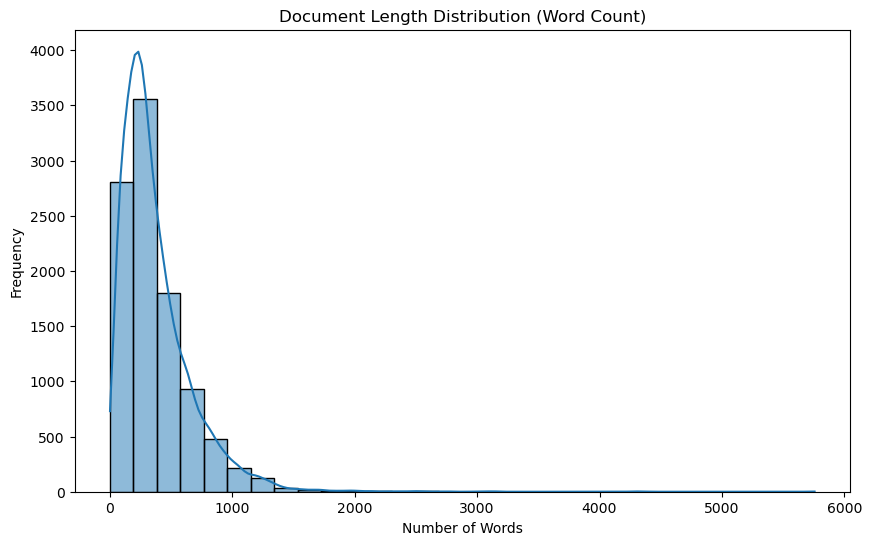

In [16]:
# Text Length Distribution (Documents)
train_df['doc_length'] = train_df['document'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(train_df['doc_length'], bins=30, kde=True)
plt.title('Document Length Distribution (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


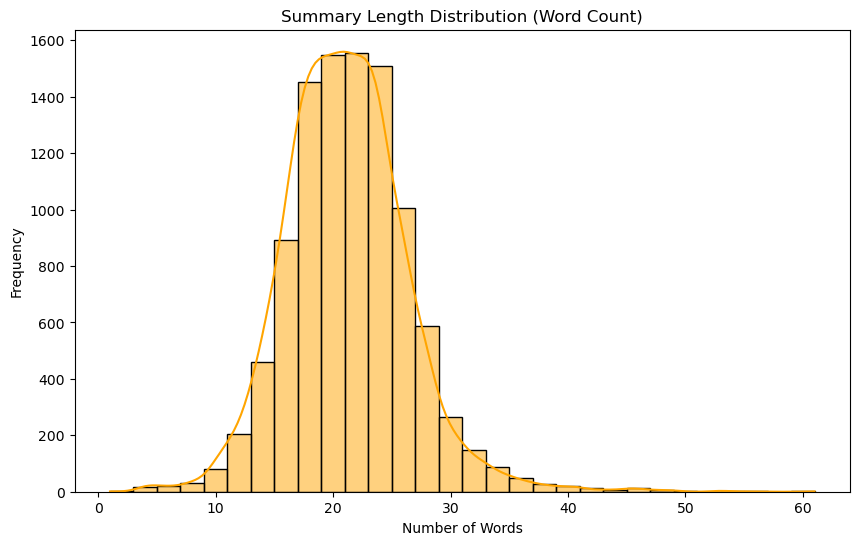

In [17]:
# Text Length Distribution (Summaries)
train_df['summary_length'] = train_df['summary'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(train_df['summary_length'], bins=30, kde=True, color='orange')
plt.title('Summary Length Distribution (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

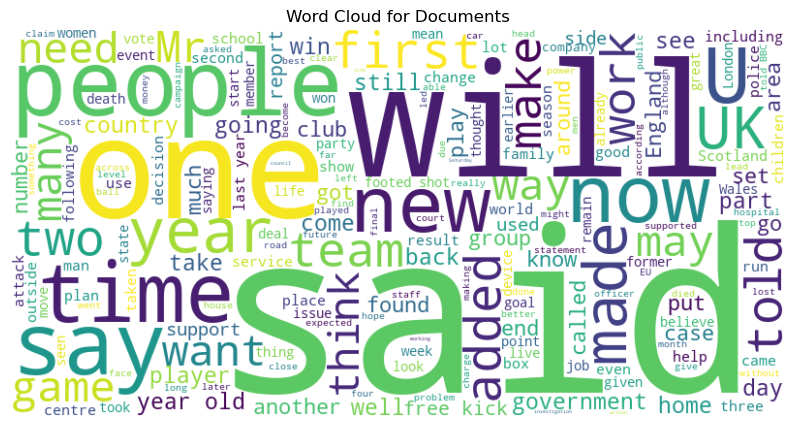

In [18]:
# Word Cloud for Documents
doc_text = ' '.join(train_df['document'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(doc_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Documents')
plt.show()

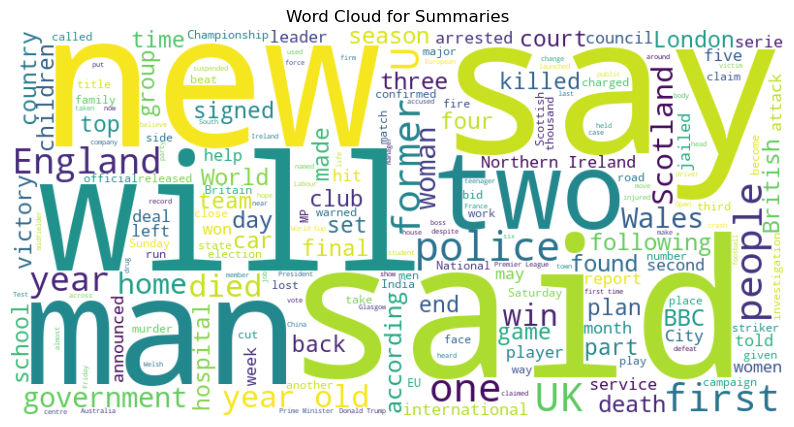

In [19]:
# Word Cloud for Summaries
summary_text = ' '.join(train_df['summary'].values)
wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate(summary_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Summaries')
plt.show()

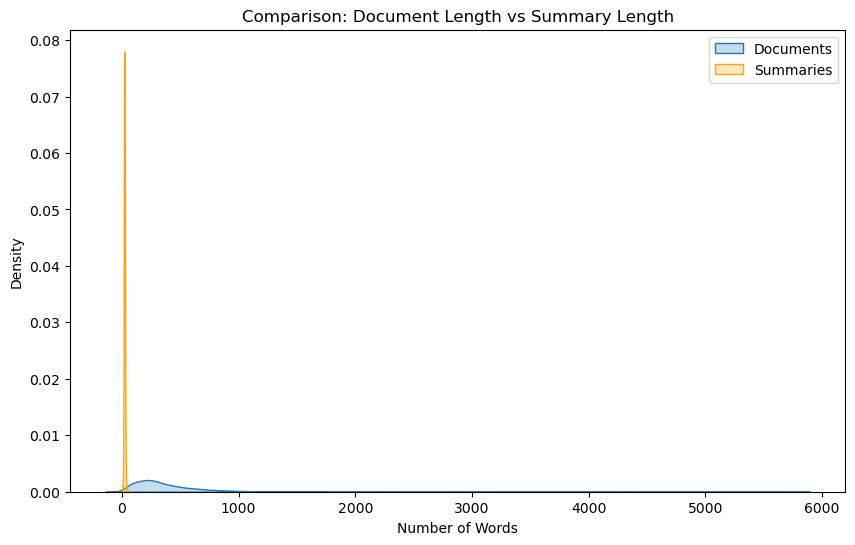

In [20]:
# Summary vs Document Length Comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df['doc_length'], label='Documents', fill=True)
sns.kdeplot(train_df['summary_length'], label='Summaries', fill=True, color='orange')
plt.title('Comparison: Document Length vs Summary Length')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.legend()
plt.show()

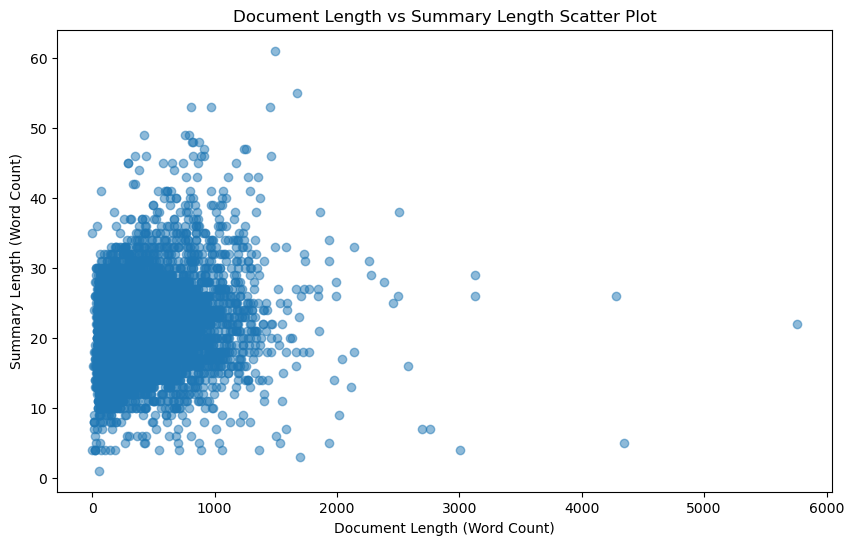

In [21]:
# Document vs Summary Token Count Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(train_df['doc_length'], train_df['summary_length'], alpha=0.5)
plt.title('Document Length vs Summary Length Scatter Plot')
plt.xlabel('Document Length (Word Count)')
plt.ylabel('Summary Length (Word Count)')
plt.show()

In [22]:
# Helper function to plot n-grams
def plot_ngrams(corpus, n=2, num_ngrams=20):
    tokens = [word for text in corpus for word in nltk.word_tokenize(text.lower())]
    ngram_freq = Counter(ngrams(tokens, n))
    most_common_ngrams = ngram_freq.most_common(num_ngrams)
    ngrams_df = pd.DataFrame(most_common_ngrams, columns=['ngram', 'count'])
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=ngrams_df, x='count', y=ngrams_df['ngram'].apply(lambda x: ' '.join(x)))
    plt.title(f'Top {num_ngrams} {n}-grams')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-gram')
    plt.show()


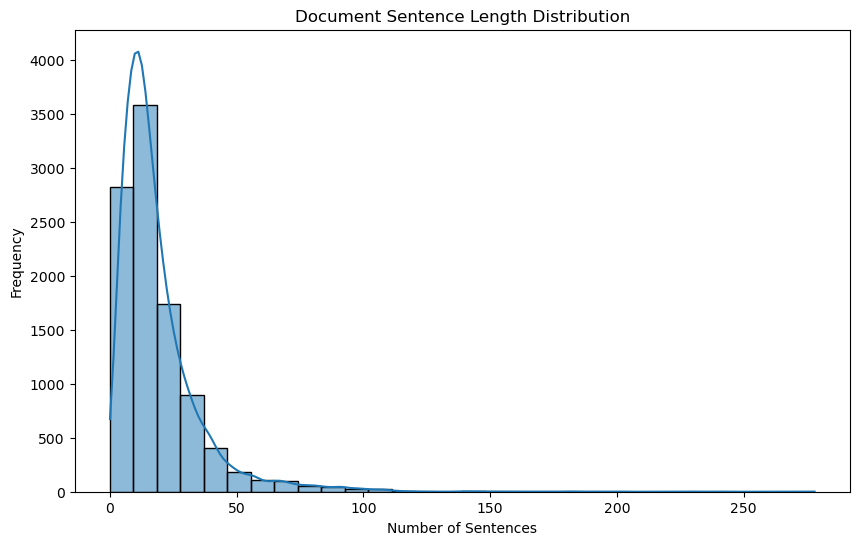

In [23]:
# Histogram of Sentence Lengths (Documents)
train_df['doc_sentence_count'] = train_df['document'].apply(lambda x: len(nltk.sent_tokenize(x)))
plt.figure(figsize=(10, 6))
sns.histplot(train_df['doc_sentence_count'], bins=30, kde=True)
plt.title('Document Sentence Length Distribution')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.show()


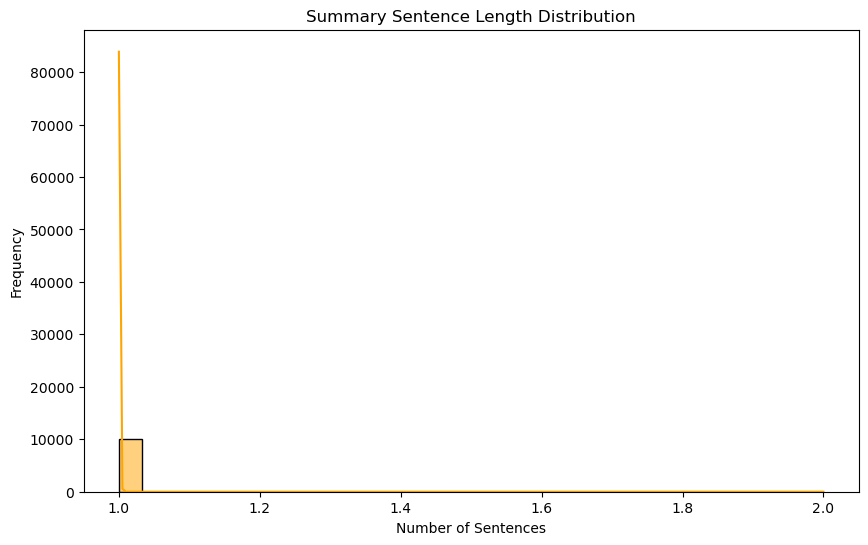

In [24]:
# Histogram of Sentence Lengths (Summaries)
train_df['summary_sentence_count'] = train_df['summary'].apply(lambda x: len(nltk.sent_tokenize(x)))
plt.figure(figsize=(10, 6))
sns.histplot(train_df['summary_sentence_count'], bins=30, kde=True, color='orange')
plt.title('Summary Sentence Length Distribution')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.show()


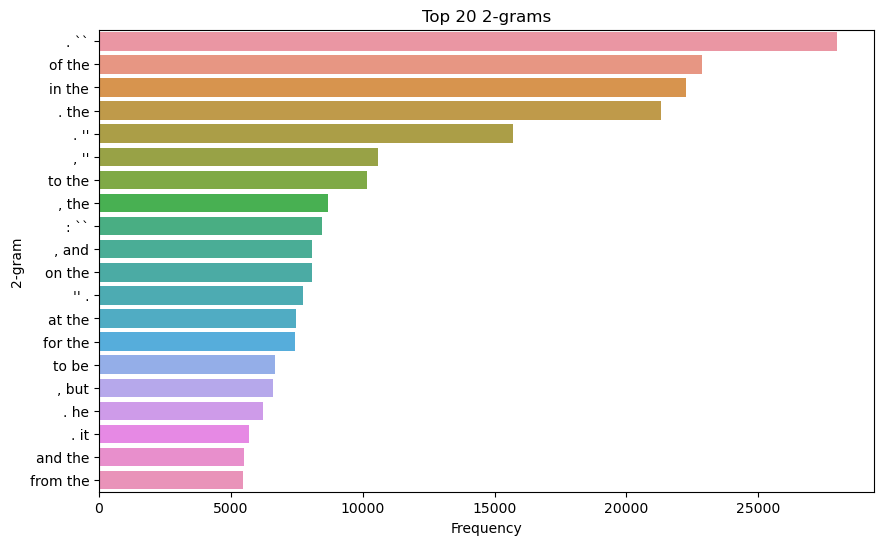

In [25]:
# N-Grams (Bigrams)
plot_ngrams(train_df['document'], n=2, num_ngrams=20)


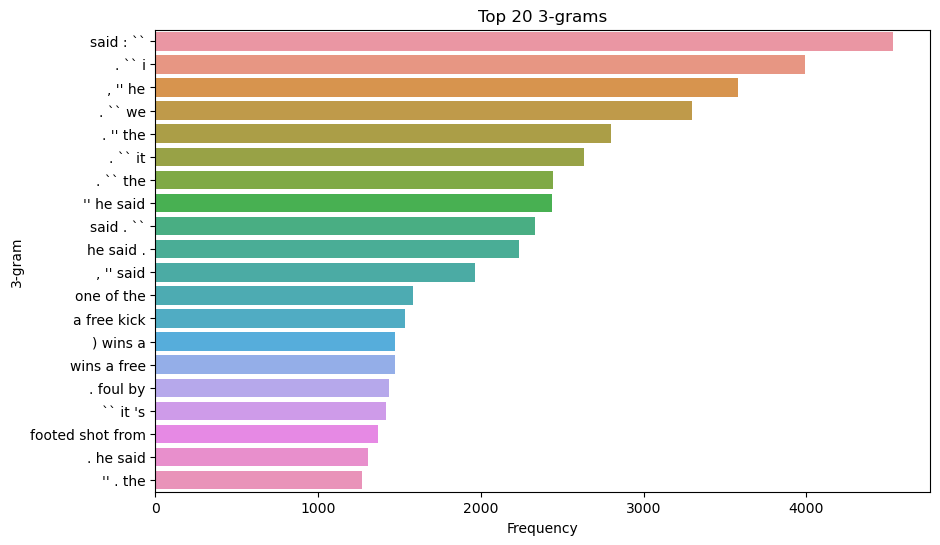

In [26]:
# N-Grams (Trigrams)
plot_ngrams(train_df['document'], n=3, num_ngrams=20)


In [27]:
import nltk

# Download the 'averaged_perceptron_tagger' resource
nltk.download('averaged_perceptron_tagger')

# Download 'punkt' for tokenization (if not already downloaded)
nltk.download('punkt')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rammanyala/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rammanyala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

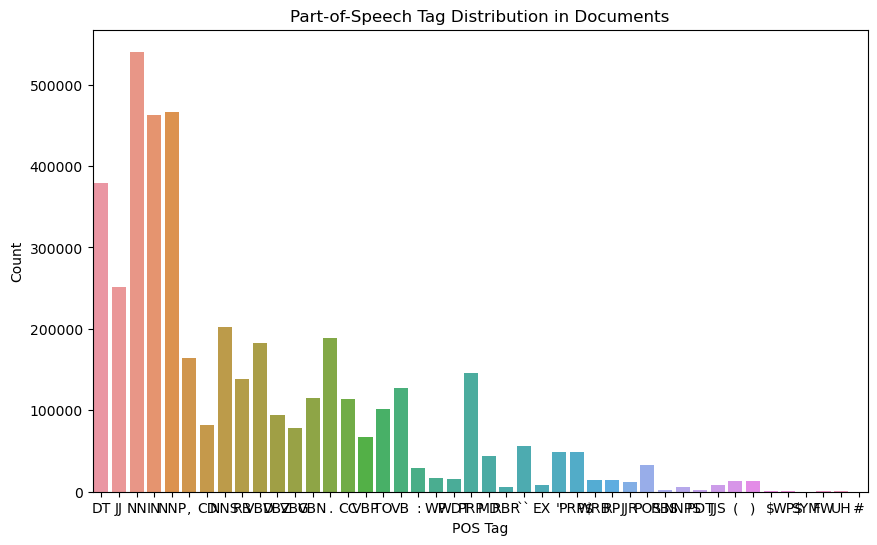

In [28]:
# Part-of-Speech Tagging Visualization
# Extract tokens and their POS tags
tokens_pos = nltk.pos_tag([word for text in train_df['document'] for word in nltk.word_tokenize(text)])
pos_counts = Counter(tag for word, tag in tokens_pos)
pos_df = pd.DataFrame(pos_counts.items(), columns=['POS', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=pos_df, x='POS', y='Count')
plt.title('Part-of-Speech Tag Distribution in Documents')
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.show()